In [2]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 12s 0us/step


In [0]:
import numpy as np
import tensorflow as tf

In [0]:
def normalization(images):
    images = images.reshape(-1, 3072)
    each_pixel_mean = images.mean(axis=0)
    each_pixel_std = np.std(images, axis=0)
    images = np.divide(np.subtract(images, each_pixel_mean), each_pixel_std)
    return images.reshape(-1, 32, 32, 3)

In [0]:
images, training_labels = normalization(x_train), y_train
test_image, test_labels = normalization(x_test), y_test

In [0]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [8]:
def svmclassifier(images,test_image,training_labels,test_labels):
    n_training = len(images)
    n_test = len(test_image)
    images = images.reshape((n_training, 3072))
    test_image = test_image.reshape((n_test,3072))
    lin_clf = LinearSVC()
    lin_clf.fit(images, training_labels)
    predict_label = lin_clf.predict(test_image)
    accuracy = accuracy_score(test_labels,predict_label)
    return predict_label, accuracy

predict_label, accuracy = svmclassifier(images,test_image,training_labels,test_labels)
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.242


In [0]:
test_labels = y_test.T[0]

In [10]:
def confusion_matrix(actual, predict):
    cmatrix = np.zeros((10, 10)).astype(int)
    for i in range(10000):
        if actual[i] == predict[i]:
            cmatrix[actual[i]][actual[i]] += 1
        else:
            cmatrix[actual[i]][predict[i]] += 1
    return cmatrix

cm = confusion_matrix(test_labels, predict_label)
print(cm)
print("Accuracy = {:>6.4f}".format(cm.diagonal().sum()*1.0/cm.sum()))

[[158  56  41  24  48 237  59  31 215 131]
 [ 40 326  64  43  27  73  86  49  71 221]
 [ 56 135 233  49  74 137 112  88  71  45]
 [ 57 202 141  83  43 179 122  44  61  68]
 [ 53 155 239  47  99  91  85 142  25  64]
 [ 48 184 151  62  49 240  84  87  60  35]
 [ 32 206 193  55  41  63 270  75  29  36]
 [ 58 143  72  54 111 104  57 274  30  97]
 [ 50  65  46  33  24 152  30  29 336 235]
 [ 50 160  38  65  51  75  78  43  39 401]]
Accuracy = 0.2420


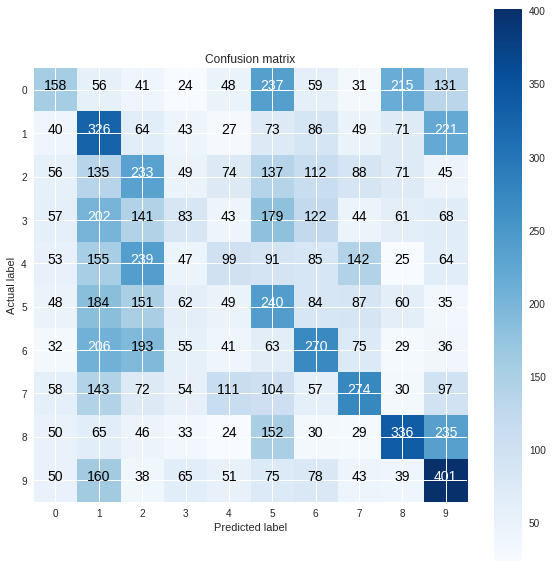

In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, label_num):
    labels = range(label_num)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    marks = np.arange(len(labels))
    plt.xticks(marks, labels)
    plt.yticks(marks, labels)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]), fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, 10)

In [12]:
def evaluation(cmatrix):
    print("|  Label  | Precision | Recall | F-Score |")
    total_p = 0
    total_r = 0
    total_f = 0
    for i in range(10):
        precision = cmatrix[i, i]*1.0/cmatrix[:, i].sum()
        recall = cmatrix[i, i]*1.0/cmatrix[i, :].sum()
        fscore = precision*recall*2.0/(precision+recall)
        total_p += precision
        total_r += recall
        total_f += fscore
        print('|{:>8d} | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(i, precision, recall, fscore))
    print('| Average | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(total_p/10.0, total_r/10.0, total_f/10.0))

evaluation(cm)

|  Label  | Precision | Recall | F-Score |
|       0 |    0.2625 | 0.1580 |  0.1973 |
|       1 |    0.1998 | 0.3260 |  0.2477 |
|       2 |    0.1913 | 0.2330 |  0.2101 |
|       3 |    0.1612 | 0.0830 |  0.1096 |
|       4 |    0.1746 | 0.0990 |  0.1264 |
|       5 |    0.1776 | 0.2400 |  0.2042 |
|       6 |    0.2747 | 0.2700 |  0.2723 |
|       7 |    0.3179 | 0.2740 |  0.2943 |
|       8 |    0.3586 | 0.3360 |  0.3469 |
|       9 |    0.3008 | 0.4010 |  0.3438 |
| Average |    0.2419 | 0.2420 |  0.2352 |
